In [72]:
import pandas as pd

In [73]:
df = pd.read_csv("zgpa_train.csv")
df.head()

,date,open,high,low,close,volume
0,2016-01-04,30.57,30.57,28.63,28.78,70997200
1,2016-01-05,28.41,29.54,28.23,29.23,87498504
2,2016-01-06,29.03,29.39,28.73,29.26,48012112
3,2016-01-07,28.73,29.25,27.73,28.50,23647604
4,2016-01-08,28.73,29.18,27.63,28.67,98239664


In [74]:
df.shape

(731, 6)

In [75]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df.iloc[:-142][["open", "high", "low", "close", "volume"]])
df[["open", "high", "low", "close", "volume"]] = mms.transform(df[["open", "high", "low", "close", "volume"]])
df

,date,open,high,low,close,volume
0,2016-01-04,0.134211,0.124511,0.116935,0.099027,0.235251
1,2016-01-05,0.093609,0.105342,0.109255,0.107782,0.301918
2,2016-01-06,0.105263,0.102550,0.118856,0.108366,0.142389
3,2016-01-07,0.099624,0.099944,0.099654,0.093580,0.043954
4,2016-01-08,0.099624,0.098641,0.097734,0.096887,0.345314
...,...,...,...,...,...,...
726,2018-12-24,0.615038,0.606179,0.640553,0.636381,0.093353
727,2018-12-25,0.606391,0.615113,0.623848,0.635603,0.216934
728,2018-12-26,0.618233,0.605248,0.629992,0.617899,0.109139
729,2018-12-27,0.620301,0.607668,0.624232,0.610117,0.252187


In [76]:
df.describe()

,open,high,low,close,volume
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.406277,0.405579,0.421651,0.416313,0.202994
std,0.301609,0.304384,0.302200,0.312175,0.142722
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.120395,0.114926,0.133929,0.119261,0.100067
50%,0.410526,0.412619,0.424155,0.422568,0.173049
75%,0.696147,0.694677,0.715822,0.715661,0.264846
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import trange
import numpy as np

In [78]:
X = []
y = []
for i in range(19, len(df)):
    X.append(df.iloc[i - 19:i, 4].values)  # 输入数据未取到i时刻
    y.append(df.iloc[i, 4])  # 标签数据为i时刻
X = torch.tensor(X, dtype=torch.float).view(-1, 19, 1)
y = torch.tensor(y, dtype=torch.float).view(-1, 1)
X.shape, y.shape

(torch.Size([712, 19, 1]), torch.Size([712, 1]))

In [79]:
train_size = int(X.shape[0] * 0.8)
train_size

569

In [80]:
x_train = X[: train_size]
y_train = y[: train_size]
x_test = X[train_size:]
y_test = y[train_size:]
trainloader = zip(x_train, y_train)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([569, 19, 1]),
 torch.Size([569, 1]),
 torch.Size([143, 19, 1]),
 torch.Size([143, 1]))

In [81]:
nn.LSTM?

In [82]:
class LSTM(nn.Module):

    def __init__(self, input_dim, hidden_dim, num_layers, output_dim) -> None:
        super(LSTM, self).__init__()

        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

100%|██████████| 10000/10000 [12:29<00:00, 13.35it/s]

tensor(0.0001, grad_fn=<MseLossBackward0>)


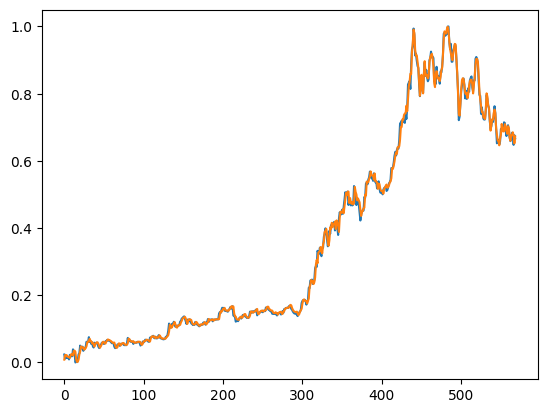

In [98]:
import matplotlib.pyplot as plt

model = LSTM(1, 32, 2, 1)
optimizer = optim.Adam(model.parameters())
criterion = nn.MSELoss()

for i in trange(10000):
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i == 9999):
        print(loss)
        plt.plot(y_train)
        plt.plot(y_pred.detach())

In [99]:
y_pred = model(x_test)
loss = criterion(y_pred, y_test)
print(loss)

tensor(0.0017, grad_fn=<MseLossBackward0>)


In [100]:
import matplotlib.pyplot as plt

In [101]:
x = np.linspace(1, len(y_test), len(y_test))
x

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.])

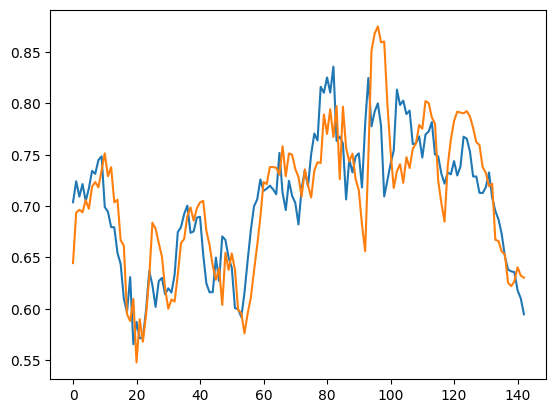

In [102]:
plt.plot(y_test)
plt.plot(y_pred.detach())